In [56]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import seaborn

In [4]:
#import nltk
#nltk.download()

In [5]:
#from nltk.book import *

In [12]:
df=pd.read_csv('winequality-white.csv')


In [13]:
df.shape


(4898, 12)

In [14]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [15]:
#df.rename(columns={'Unnamed: 0' : 'nothing'},inplace=True)

In [16]:
#df.drop(['nothing','region_2'], 1,inplace=True)

In [17]:
df.isnull().sum()/len(df)

fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
quality                 0.0
dtype: float64

In [18]:
df=df.dropna(axis=0,how='any')  ##delet missing value

In [19]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [20]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [23]:
#df['winery']=df['winery'].str.lower()
df.quality.value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

In [26]:
#names=list(df.columns.values)
#names.remove('points')
#names.remove('price')
#names
df.pH.value_counts()

3.14    172
3.16    164
3.22    146
3.19    145
3.18    138
3.20    137
3.08    136
3.15    136
3.10    135
3.12    134
3.24    132
3.11    126
3.17    124
3.13    117
3.23    116
3.06    115
3.25    114
3.04     97
3.26     96
3.21     95
3.30     93
3.09     92
3.05     89
3.27     88
3.28     87
3.32     86
3.36     83
3.29     82
3.34     79
3.31     79
       ... 
3.63      6
3.59      6
3.66      5
3.58      5
3.57      5
2.83      4
3.65      4
3.61      3
2.79      3
2.80      3
3.72      3
3.68      2
3.64      2
3.80      2
3.74      2
3.69      2
3.77      2
3.75      2
3.76      2
3.70      1
2.72      1
3.67      1
3.62      1
3.82      1
2.77      1
3.79      1
2.84      1
2.74      1
3.81      1
2.82      1
Name: pH, Length: 103, dtype: int64

In [25]:
#for i in names:
    #df[i]=df[i].str.lower()

#df.head()

In [289]:
#df['winery_count']=df.groupby(['winery'])['points'].transform('count')

In [28]:
#df['winery_count'].describe()

In [291]:
#df2=df[(df.winery_count>9) & (df.points>86)]

In [27]:
#df2.head()

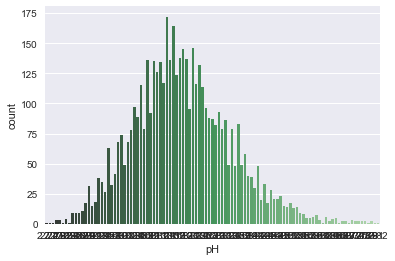

In [30]:
sns.countplot(x='pH',data=df,palette="Greens_d")

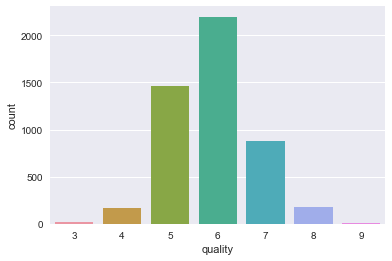

In [31]:
sns.countplot(x='quality',data=df)

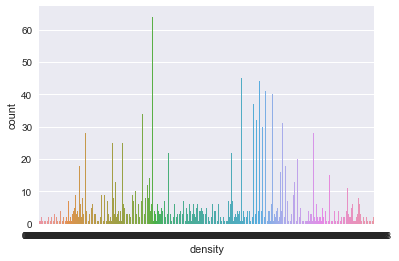

In [32]:
sns.countplot(x='density',data=df)

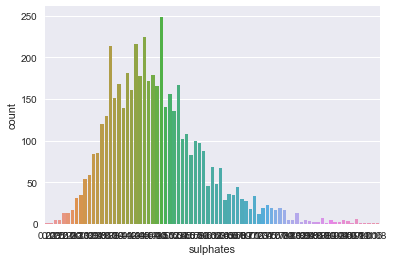

In [35]:
sns.countplot(x='sulphates',data=df)

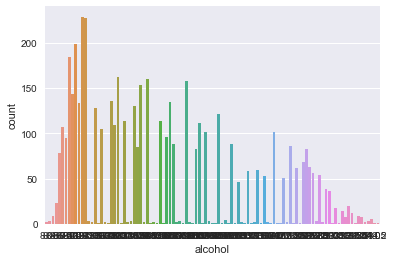

In [36]:
sns.countplot(x='alcohol',data=df)

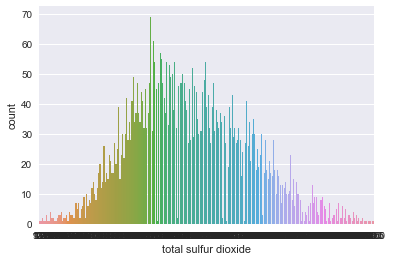

In [37]:
sns.countplot(x='total sulfur dioxide',data=df)

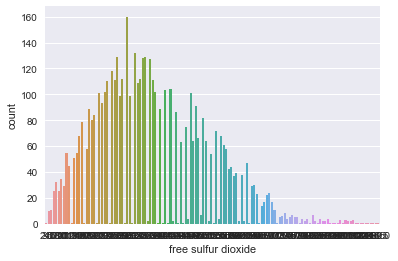

In [38]:
sns.countplot(x='free sulfur dioxide',data=df)

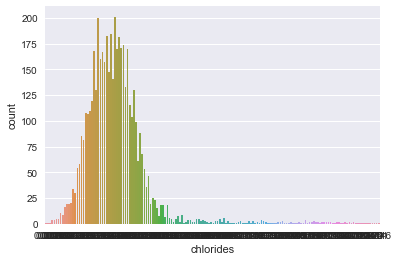

In [39]:
sns.countplot(x='chlorides',data=df)

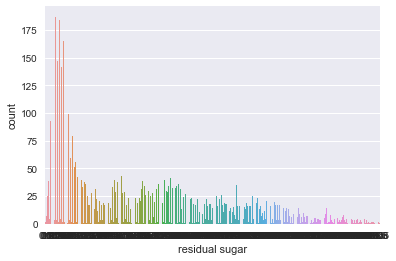

In [40]:
sns.countplot(x='residual sugar',data=df)

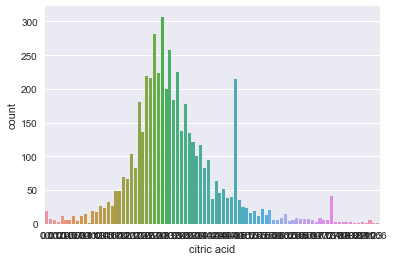

In [41]:
sns.countplot(x='citric acid',data=df)

In [ ]:
plt.boxplot(residual sugar.values)
plt.show()

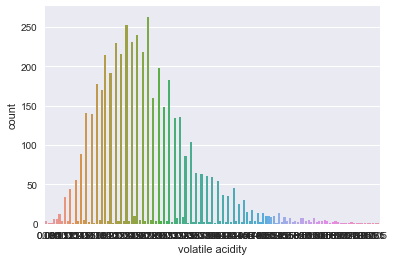

In [42]:
sns.countplot(x='volatile acidity',data=df)

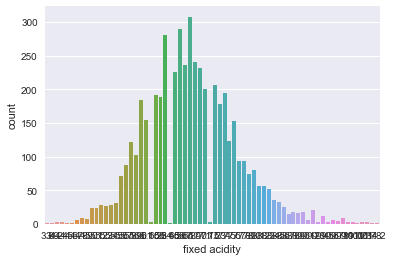

In [43]:
sns.countplot(x='fixed acidity',data=df)

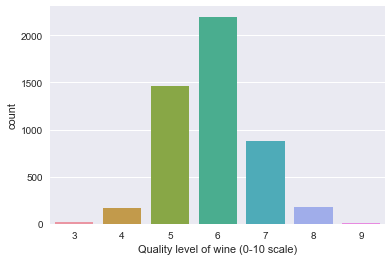

In [62]:
def countplots(x):
    x["quality"] = pd.Categorical(df["quality"])
    seaborn.countplot(x="quality", data=df)
    plt.xlabel("Quality level of wine (0-10 scale)")
    plt.show()

countplots(df)

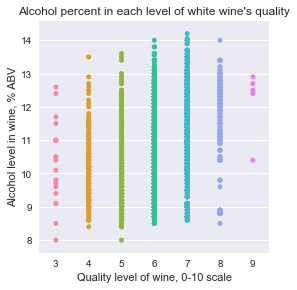

In [64]:
def factorplots(winery):
    seaborn.factorplot(x="quality", y="alcohol", data=df, kind="strip")
    plt.xlabel("Quality level of wine, 0-10 scale")
    plt.ylabel("Alcohol level in wine, % ABV")
    plt.title("Alcohol percent in each level of white wine's quality")
    plt.show()

factorplots(df)

In [33]:
#time=pd.DataFrame(df.winery.value_counts())
#data1=data.groupby("designation").filter(lambda g: (g.name != 0) and (g.designation.size >= 100))


In [34]:

#from sklearn.datasets import load_digits
#digits = load_digits()
#digits.data

In [307]:

#array_df=df2.as_matrix()

In [ ]:
#kmeans = KMeans(n_clusters=4)
#kmeans.fit(df2['points'])
#y_kmeans = kmeans.predict(df['points'])